# Example

This python notebook will contain experiments. Below is a sample experiment which is taken from main function of model.py:

In [1]:

import musicnetIO as mn
import model
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score


In [2]:
#reading data
datalist = mn.readData()

newdatalist = mn.filterData(datalist,keepinstr=[1],keepnotes=0,excludenotes=0,excludeinstr=-1)

traindl,valdl,testdl = mn.splitData(newdatalist)

duration of all test files: 89.35034013605443 seconds
test files: ['2303'] 
duration of all train files: 1271.2111111111112 seconds
train files: ['1727', '2677', '2678'] 
duration of all val files: 245.15614512471655 seconds
val files: ['1730'] 


In [3]:
#below we print number of positive samples for each note in the notelist
#model.notelist contains notes we are interested in predicting
td, _ = mn.sampleData(valdl)
y=np.concatenate(td['y'],axis=1)[model.notelist] #keep only note labels
print (np.ndarray.tolist(np.sum(y,axis=1)))

[995.0, 3826.0, 276.0]


In [4]:
#training
stftmod = model.fbmodel(fb='stft')

stftmod.train(traindl)

0
1
2


In [5]:
#prediction
yhat, y = stftmod.predict(valdl)

print (y.shape)
print (yhat.shape)
print (y)
print ("-----")
print (yhat)

(3, 18950)
(3, 18950)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 0. 0. 0.]]
-----
[[0 0 0 ... 1 1 1]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 1]]


average_precision_score is: 0.09024454213578827


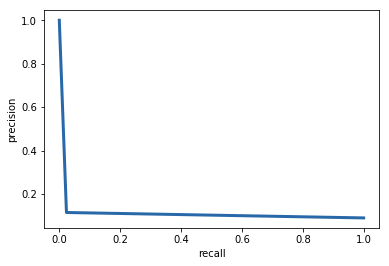

In [7]:
#score calculation
print ("average_precision_score is: {}".format(model.computescore(yhat,y,func='f1')))

precision, recall, _ = precision_recall_curve(np.transpose(y).flatten(), np.transpose(yhat).flatten())
fig = plt.figure()
plt.plot(recall,precision,color=(41/255.,104/255.,168/255.),linewidth=3)
fig.axes[0].set_xlabel('recall')
fig.axes[0].set_ylabel('precision')
plt.show()